<a href="https://colab.research.google.com/github/VitorGama10/Deep_Learning/blob/main/Pratica_Classifica%C3%A7%C3%A3o_roupa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os dados

In [139]:
from tensorflow import keras 
import tensorflow
import pandas as pd
import numpy as np

dataset = keras.datasets.fashion_mnist
((treino_x, teste_x), (treino_y, teste_y)) = dataset.load_data()

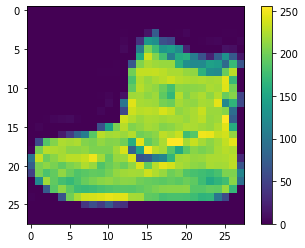

In [140]:
import matplotlib.pyplot as plt

total_de_classificaçoes = 10
nomes_de_classificaçoes = ['Camisa', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Bota']

plt.imshow(treino_x[0])
plt.colorbar()

# Selecionando modelos

In [141]:
treino_x.shape

(60000, 28, 28)

In [142]:
dados = pd.DataFrame([teste_x])
dados

,0,1,2,3,4,5,6,7,8,9,...,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
0,9,0,0,3,0,2,7,2,5,5,...,4,1,7,2,8,5,1,3,0,5


# Criando, compilando, treinando e normalizando o modelo

In [143]:
# normalização do modelo
treino_x = treino_x/255.0 # ajudou muito no resultado


modelo = keras.Sequential([
# ENTRADA
         # em uma dimensão só
keras.layers.Flatten(input_shape=(28,28)),

#Processamento
keras.layers.Dense(256, activation = tensorflow.nn.relu),  # relu transforma todos numeros negativos em 0, olha nos valores positivos
keras.layers.Dense(130, activation = tensorflow.nn.relu),  # relu transforma todos numeros negativos em 0, olha nos valores positivos
# keras.layers.Dropout(0.2),   # adormece 20% de alguns elementos

#saida 
keras.layers.Dense(10, activation = tensorflow.nn.softmax) # fica entre 0 e 1
                 #10 imagens 
])

#compilado      #deixa o treino melhor
modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
                                 # loss é a perda

historico = modelo.fit(treino_x, teste_x, epochs = 8, validation_split = 0.2) #20% para a validação 
                              # tempo para treina o modelo 

Epoch 1/8
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4940 - accuracy: 0.8231 - val_loss: 0.3984 - val_accuracy: 0.8568
Epoch 2/8
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3693 - accuracy: 0.8639 - val_loss: 0.3895 - val_accuracy: 0.8601
Epoch 3/8
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3308 - accuracy: 0.8791 - val_loss: 0.3366 - val_accuracy: 0.8789
Epoch 4/8
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3097 - accuracy: 0.8851 - val_loss: 0.3447 - val_accuracy: 0.8752
Epoch 5/8
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2890 - accuracy: 0.8913 - val_loss: 0.3329 - val_accuracy: 0.8798
Epoch 6/8
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2721 - accuracy: 0.8978 - val_loss: 0.3132 - val_accuracy: 0.8875
Epoch 7/8
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2613 - accuracy: 0.9018 - val_loss: 0.3057 - val_accuracy: 0.8907

# Salvando o modelo

In [144]:
from tensorflow.keras.models import load_model
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [145]:
historico.history

{'accuracy': [0.8231458067893982,
  0.8638749718666077,
  0.8790833353996277,
  0.8850833177566528,
  0.8912916779518127,
  0.8977708220481873,
  0.901770830154419,
  0.905875027179718],
 'loss': [0.4940228760242462,
  0.36934855580329895,
  0.3308245539665222,
  0.30970343947410583,
  0.2889997363090515,
  0.27211642265319824,
  0.26125070452690125,
  0.24803511798381805],
 'val_accuracy': [0.8568333387374878,
  0.8600833415985107,
  0.8789166808128357,
  0.875166654586792,
  0.8798333406448364,
  0.887499988079071,
  0.890666663646698,
  0.8813333511352539],
 'val_loss': [0.3983715772628784,
  0.389493852853775,
  0.33661791682243347,
  0.34474077820777893,
  0.33285608887672424,
  0.31323128938674927,
  0.3056877553462982,
  0.33724620938301086]}

# Visualizando as acurácias de treino e validação por época

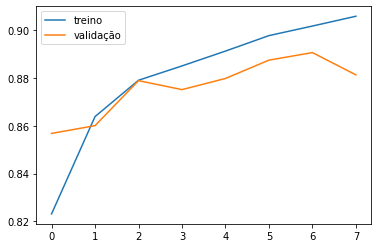

In [146]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy']) # tem que ser maior que o treino

plt.legend(['treino', 'validação'])

# Visualizando perda de teste e validadação por epocas

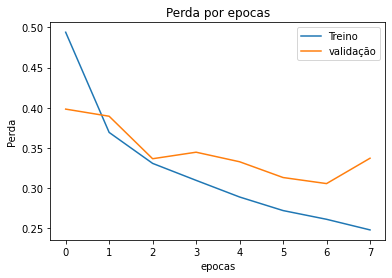

In [147]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss']) # tem q ser maior

plt.title('Perda por epocas')

plt.xlabel('epocas')
plt.ylabel('Perda')

plt.legend(['Treino', 'validação']) # criou uma legenda 

# Testando o modelo

In [148]:
teste = modelo.predict(treino_x)
print('resultado teste:', np.argmax(teste[0])) # argmax retorna o índice do maior valor
print('resultado teste:', np.argmax(teste_x[0]))

resultado teste: 9
resultado teste: 0


# Avaliando o modelo

In [149]:
                                #avalia o modelo.
perda_teste, acuracia = modelo.evaluate(treino_x, teste_x)
print('Perda de teste', perda_teste)
print('A acuracia do teste', acuracia)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2590 - accuracy: 0.9024
Perda de teste 0.2590157389640808
A acuracia do teste 0.9023666381835938
